In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns


# Wine Quality Data Set

The dataset was downloaded from UCI Macine Learning Repository.  The dataset is about wine quality.
There are two datasets related to red and white variants of the Portuguese "Vinho Verde" wine.
The dataset purpose is to model the wine quality based on physicochemal tests.

__Dataset Source:__ [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

These datasets can be viewed as classification or regression tasks.  However, for this assignment, I am only concentrating on classification task and in particular, the red wine dataset.


In [2]:
#dataset file name
filename = 'winequality-red.csv'

#directory the dataset file is residing
#it is expected to reside in the same directory as this notebook
filedir = '.\\'
file = os.path.join(filedir, filename)

columnNames = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 
               'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']
wdf = pd.read_csv(file, sep=';', names=columnNames, skiprows=1)


In [3]:
#sanity check
#- there are 1599 rows and 11 features and 1 label (Quality)

wdf.shape
wdf.head()
wdf.tail()


(1599, 12)

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
wdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
FixedAcidity          1599 non-null float64
VolatileAcidity       1599 non-null float64
CitricAcid            1599 non-null float64
ResidualSugar         1599 non-null float64
Chlorides             1599 non-null float64
FreeSulfurDioxide     1599 non-null float64
TotalSulfurDioxide    1599 non-null float64
Density               1599 non-null float64
pH                    1599 non-null float64
Sulphates             1599 non-null float64
Alcohol               1599 non-null float64
Quality               1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#check for null - looks like there is none
wdf.isnull().values.any()
wdf.isnull().sum()

#check for any cell that is missing in dataframe - look like no missing cell
wdf.isna().any().any()

False

FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
Quality               0
dtype: int64

False

In [6]:
descT = wdf.describe().transpose()
cols = list(descT)

#move 'max' column next to 'min' column for easier visual comparison
cols.insert(cols.index('25%'), cols.pop(cols.index('max')))
descT = descT.loc[:, cols]
descT

,count,mean,std,min,max,25%,50%,75%
FixedAcidity,1599.0,8.319637,1.741096,4.60000,15.90000,7.1000,7.90000,9.200000
VolatileAcidity,1599.0,0.527821,0.179060,0.12000,1.58000,0.3900,0.52000,0.640000
CitricAcid,1599.0,0.270976,0.194801,0.00000,1.00000,0.0900,0.26000,0.420000
ResidualSugar,1599.0,2.538806,1.409928,0.90000,15.50000,1.9000,2.20000,2.600000
Chlorides,1599.0,0.087467,0.047065,0.01200,0.61100,0.0700,0.07900,0.090000
FreeSulfurDioxide,1599.0,15.874922,10.460157,1.00000,72.00000,7.0000,14.00000,21.000000
TotalSulfurDioxide,1599.0,46.467792,32.895324,6.00000,289.00000,22.0000,38.00000,62.000000
Density,1599.0,0.996747,0.001887,0.99007,1.00369,0.9956,0.99675,0.997835
pH,1599.0,3.311113,0.154386,2.74000,4.01000,3.2100,3.31000,3.400000
Sulphates,1599.0,0.658149,0.169507,0.33000,2.00000,0.5500,0.62000,0.730000


In [7]:
#imbalance in Quality
#there are more average wines (681+638) than low (10+53) and high quality wines (199+18)

wdf.Quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: Quality, dtype: int64

In [8]:
def wineBoxPlot(df, cols, colx = 'Quality'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(colx, col, data=df)
        plt.xlabel(colx)
        plt.ylabel(col)
        plt.show()
    

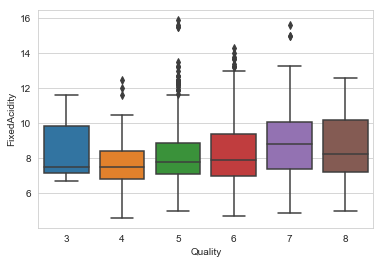

In [9]:
#many outliers for wine qualities 5 & 6

wineBoxPlot (wdf, columnNames[:1])

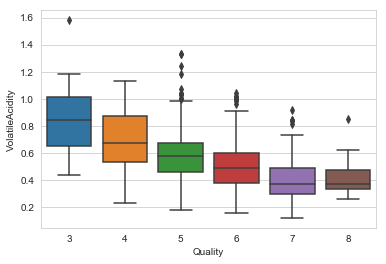

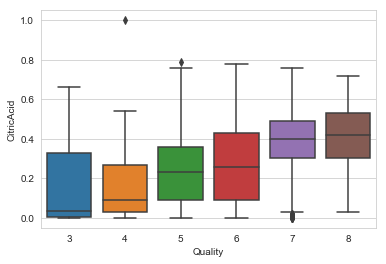

In [10]:
#good wine has lower Volatile Acidity
#good wine has higher Citric Acid
#many outliers for wine qualities 5 & 6

wineBoxPlot (wdf, columnNames[1:3])

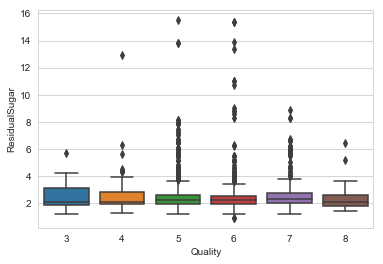

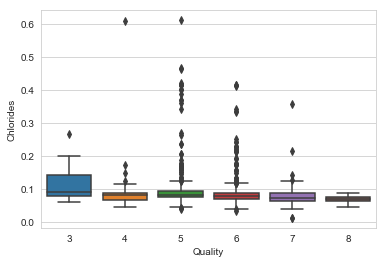

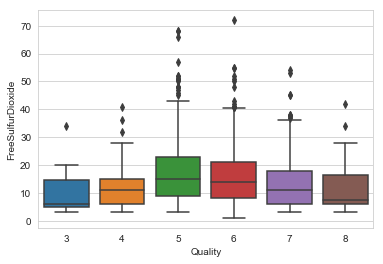

In [11]:
#many outliers for wine qualities 5 & 6
wineBoxPlot (wdf, columnNames[3:6])


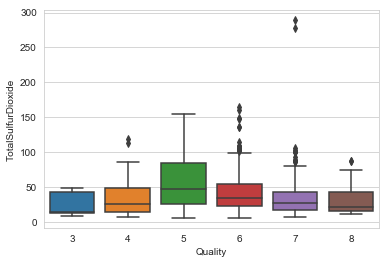

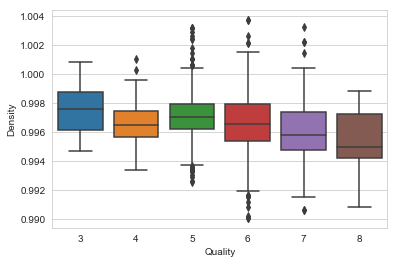

In [12]:
#good wine has lower Density
#many outliers for wine quality 5 & 6

wineBoxPlot (wdf, columnNames[6:8])

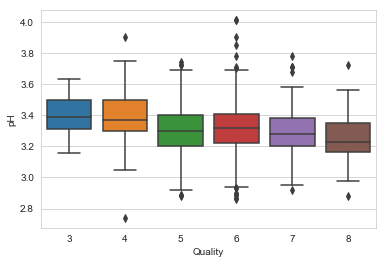

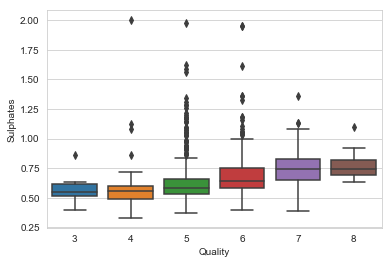

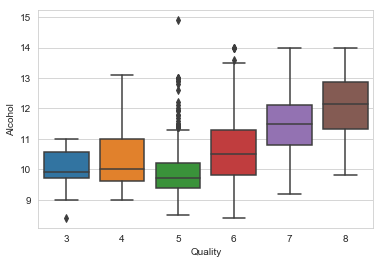

In [13]:
#good wine has lower pH
#good wine has higher Sulphates and Alcohol
#many outliers for wine qualities 5 & 6

wineBoxPlot (wdf, columnNames[8:11])

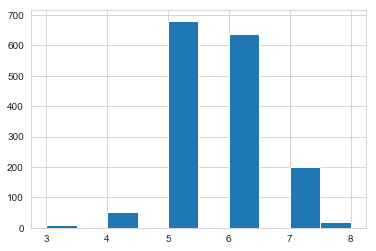

In [19]:
#imbalances in Quality
#notice quality=9 is not plotted due to its low frequency

wdf.Quality.hist()

(<Figure size 792x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e39d6e3888>)

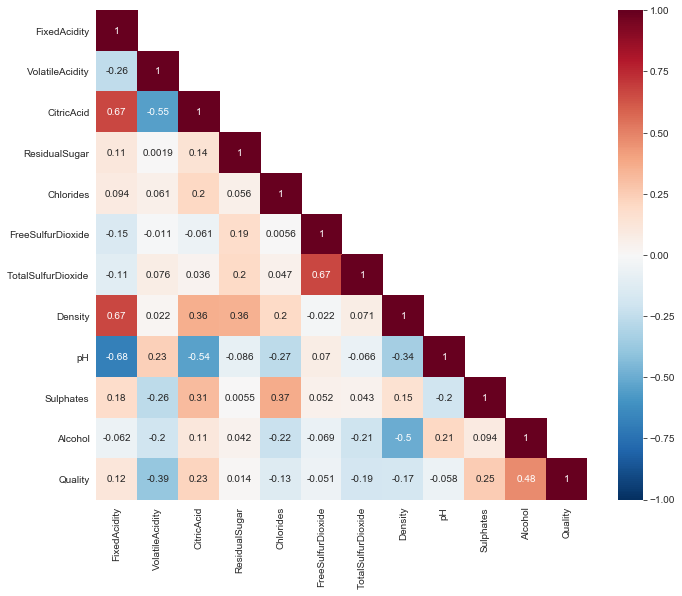

In [46]:
#plot the correlation as heatmap
corr = wdf.corr()

plt.subplots(figsize=(11, 9))

mask = np.triu(corr, k=1)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center= 0, cmap='RdBu_r', mask=mask)
